In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [3]:
import datetime as dt

In [4]:
import warnings; warnings.simplefilter('ignore')

In [5]:
df = pd.read_parquet('/content/drive/MyDrive/green_tripdata_2022-01.parquet')

In [6]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [7]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [8]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object



*   VendorID A code indicating the LPEP provider that provided the record. 
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
*  lpep_pickup_datetime The date and time when the meter was engaged. 
*  lpep_dropoff_datetime The date and time when the meter was disengaged. 
*  Passenger_count The number of passengers in the vehicle. This is a driver-entered value.
*  Trip_distance The elapsed trip distance in miles reported by the taximeter.
*  PULocationID TLC Taxi Zone in which the taximeter was engaged
*  DOLocationID TLC Taxi Zone in which the taximeter was disengaged
*  RateCodeID The final rate code in effect at the end of the trip.
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride
*  Store_and_fwd_flag This flag indicates whether the trip record was held in vehicle 
memory before sending to the vendor, aka “store and forward,” 
because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip
*  Payment_type A numeric code signifying how the passenger paid for the trip. 
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip
*  Fare_amount The time-and-distance fare calculated by the meter.
*  Extra Miscellaneous extras and surcharges. Currently, this only includes 
the 0.50 and 1 rush hour and overnight charges.
*  MTA_tax 0.50 MTA tax that is automatically triggered based on the metered 
rate in use.
*  Improvement_surcharge $0.30 improvement surcharge assessed on hailed trips at the flag 
drop. The improvement surcharge began being levied in 2015.
*  Tip_amount Tip amount – This field is automatically populated for credit card 
tips. Cash tips are not included.
*  Tolls_amount Total amount of all tolls paid in trip. 
*  Total_amount The total amount charged to passengers. Does not include cash tips.
*  Trip_type A code indicating whether the trip was a street-hail or a dispatch
that is automatically assigned based on the metered rate in use but 
can be altered by the driver.
1= Street-hail
2= Dispatch





In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62495 entries, 0 to 62494
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62495 non-null  int64         
 1   lpep_pickup_datetime   62495 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62495 non-null  datetime64[ns]
 3   store_and_fwd_flag     56200 non-null  object        
 4   RatecodeID             56200 non-null  float64       
 5   PULocationID           62495 non-null  int64         
 6   DOLocationID           62495 non-null  int64         
 7   passenger_count        56200 non-null  float64       
 8   trip_distance          62495 non-null  float64       
 9   fare_amount            62495 non-null  float64       
 10  extra                  62495 non-null  float64       
 11  mta_tax                62495 non-null  float64       
 12  tip_amount             62495 non-null  float64       
 13  t



# 1.   ***we can see 'ehail_fee' consits of nothing. So, droping of that column***.






In [10]:
# Dropping the Column.
df = df.drop('ehail_fee',axis=1)

# ***Missing values and percentage***

In [11]:
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       6295
RatecodeID               6295
PULocationID                0
DOLocationID                0
passenger_count          6295
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             6295
trip_type                6295
congestion_surcharge     6295
dtype: int64

In [12]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

store_and_fwd_flag 0.1007  % missing values
RatecodeID 0.1007  % missing values
passenger_count 0.1007  % missing values
payment_type 0.1007  % missing values
trip_type 0.1007  % missing values
congestion_surcharge 0.1007  % missing values


In [13]:
df.nunique()


VendorID                     2
lpep_pickup_datetime     60635
lpep_dropoff_datetime    60610
store_and_fwd_flag           2
RatecodeID                   5
PULocationID               231
DOLocationID               240
passenger_count              9
trip_distance             1961
fare_amount               2678
extra                       10
mta_tax                      3
tip_amount                1301
tolls_amount                29
improvement_surcharge        3
total_amount              4026
payment_type                 5
trip_type                    2
congestion_surcharge         3
dtype: int64

# *   There are 2 unique vendor ids.
# *   There are 9 unique passenger counts
# *   There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.







# As the missing values percentage is low. i have dropped those rows. 

In [14]:
df_2 = df.dropna()

In [15]:
df_2.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000
mean,1.835445,1.198719,95.618630,135.728719,1.258399,4.263723,13.060379,0.385690,0.472625,1.517680,0.166456,0.297021,16.497384,1.403594,1.040925,0.706628
std,0.370782,0.862313,61.151567,77.743344,0.877743,381.428500,11.733223,0.682687,0.120803,2.341245,1.092265,0.039178,13.021279,0.516316,0.198119,1.201632
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-65.000000,-4.500000,-0.500000,-0.860000,-6.550000,-0.300000,-71.850000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,61.000000,74.000000,1.000000,1.030000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.120000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,135.000000,1.000000,1.790000,10.000000,0.000000,0.500000,0.960000,0.000000,0.300000,13.100000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,216.000000,1.000000,3.210000,15.500000,0.500000,0.500000,2.410000,0.000000,0.300000,19.860000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.000000,265.000000,8.000000,90420.670000,604.500000,4.500000,0.500000,76.770000,44.750000,0.300000,605.300000,5.000000,2.000000,2.750000




# *    In above the max trip_distance is 224481.380 which is to way high to the data or an outlier
# *   The tip amount is negative which should be always zero or postive



In [16]:
 df[df['trip_distance'] == df.trip_distance.max()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
58978,2,2022-01-16 15:15:00,2022-01-16 15:42:00,None,NaN,78,238,NaN,224481.38,30.6,0.0,0.0,8.74,0.0,0.3,42.39,NaN,NaN,NaN


In [17]:
df_2[df_2['tip_amount']>=0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,0.3,31.26,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,2,2022-01-31 23:33:59,2022-01-31 23:47:07,N,1.0,74,42,1.0,2.09,10.5,0.50,0.5,0.00,0.0,0.3,11.80,2.0,1.0,0.00
56196,2,2022-01-31 23:53:33,2022-02-01 00:10:04,N,1.0,92,157,1.0,6.26,19.5,0.50,0.5,0.00,0.0,0.3,20.80,1.0,1.0,0.00
56197,2,2022-01-31 23:35:02,2022-01-31 23:40:52,N,1.0,95,95,1.0,0.91,6.0,0.50,0.5,1.46,0.0,0.3,8.76,1.0,1.0,0.00
56198,2,2022-01-31 23:39:20,2022-01-31 23:52:25,N,5.0,119,20,1.0,3.66,12.0,0.00,0.0,0.00,0.0,0.3,12.30,2.0,2.0,0.00


# ***So dropped the columns with tip_amount less than zero***

# **2.   From the data we can see pickup an dropoff time so can can caluclate trip duration.**



In [18]:
df_2['trip_duration'] = df_2['lpep_dropoff_datetime']-df_2['lpep_pickup_datetime']
df_2['trip_duration_min'] = df_2['trip_duration'].dt.total_seconds()/60

# **3.   Extracting Hour of the day , week day, week day number**

In [19]:
df_2['pickup_day']=df_2['lpep_pickup_datetime'].dt.day_name()
df_2['dropoff_day']=df_2['lpep_dropoff_datetime'].dt.day_name()
df_2['pickup_day_no']=df_2['lpep_pickup_datetime'].dt.weekday
df_2['dropoff_day_no']=df_2['lpep_dropoff_datetime'].dt.weekday
df_2['pickup_hour']=df_2['lpep_pickup_datetime'].dt.hour
df_2['dropoff_hour']=df_2['lpep_dropoff_datetime'].dt.hour

In [20]:
df_2.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,trip_duration,trip_duration_min,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,1.0,0.00,0 days 00:01:12,1.200000,Saturday,Saturday,5,5,0,0
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,1.0,0.00,0 days 00:08:43,8.716667,Saturday,Saturday,5,5,0,0
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,1.0,2.75,0 days 00:16:12,16.200000,Saturday,Saturday,5,5,0,1
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,1.0,0.00,0 days 00:08:15,8.250000,Saturday,Saturday,5,5,0,0
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,1.0,2.75,0 days 00:21:02,21.033333,Saturday,Saturday,5,5,0,0


In [21]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [22]:
df_2['pickup_timeofday']=df_2['pickup_hour'].apply(time_of_day)
df_2['dropoff_timeofday']=df_2['dropoff_hour'].apply(time_of_day)

As there are many outliers with 

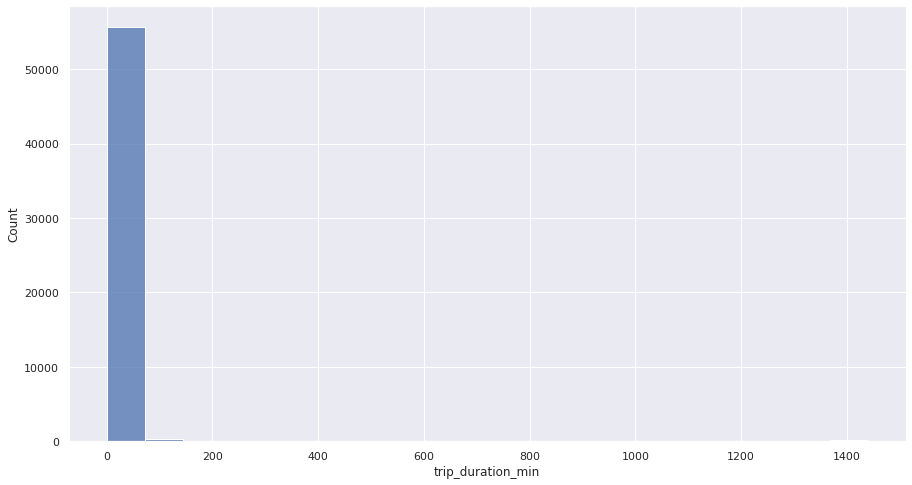

In [23]:
plt.figure(figsize=(15,8))
sns.histplot(df_2['trip_duration_min'],kde=False,bins=20)

# **The histogram is really skewed as we can see.**

# Let us also look at the boxplot.

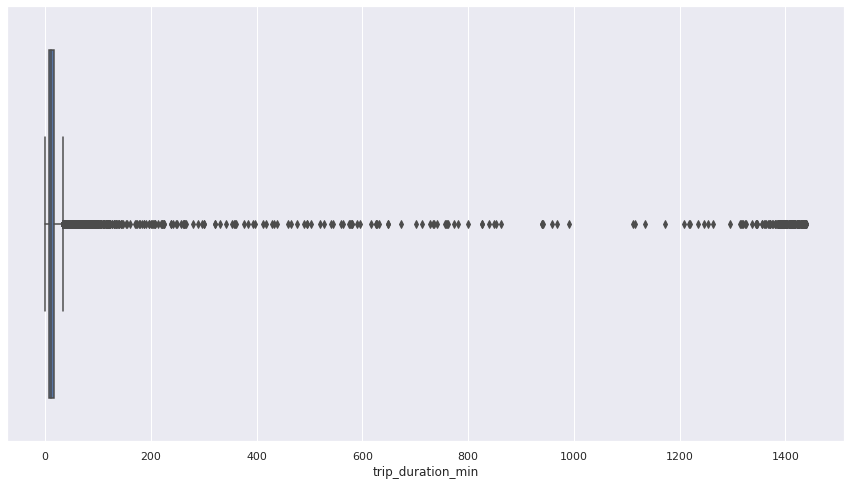

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(df_2['trip_duration_min'])

As there are many out liers on zero lets see ho many rides with zero time duration.

In [25]:
df_2[df_2['trip_duration_min'] ==0].count()

VendorID                 74
lpep_pickup_datetime     74
lpep_dropoff_datetime    74
store_and_fwd_flag       74
RatecodeID               74
PULocationID             74
DOLocationID             74
passenger_count          74
trip_distance            74
fare_amount              74
extra                    74
mta_tax                  74
tip_amount               74
tolls_amount             74
improvement_surcharge    74
total_amount             74
payment_type             74
trip_type                74
congestion_surcharge     74
trip_duration            74
trip_duration_min        74
pickup_day               74
dropoff_day              74
pickup_day_no            74
dropoff_day_no           74
pickup_hour              74
dropoff_hour             74
pickup_timeofday         74
dropoff_timeofday        74
dtype: int64

# ***There are many records with zero time duration. which cant be true or fake.so, droping them.***

In [26]:
df_2 = df_2[df_2['trip_duration_min'] !=0]
df_2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_duration,trip_duration_min,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,0 days 00:01:12,1.200000,Saturday,Saturday,5,5,0,0,Late night,Late night
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,0 days 00:08:43,8.716667,Saturday,Saturday,5,5,0,0,Late night,Late night
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,0 days 00:16:12,16.200000,Saturday,Saturday,5,5,0,1,Late night,Late night
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,0 days 00:08:15,8.250000,Saturday,Saturday,5,5,0,0,Late night,Late night
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,0 days 00:21:02,21.033333,Saturday,Saturday,5,5,0,0,Late night,Late night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,2,2022-01-31 23:33:59,2022-01-31 23:47:07,N,1.0,74,42,1.0,2.09,10.5,...,0 days 00:13:08,13.133333,Monday,Monday,0,0,23,23,Late night,Late night
56196,2,2022-01-31 23:53:33,2022-02-01 00:10:04,N,1.0,92,157,1.0,6.26,19.5,...,0 days 00:16:31,16.516667,Monday,Tuesday,0,1,23,0,Late night,Late night
56197,2,2022-01-31 23:35:02,2022-01-31 23:40:52,N,1.0,95,95,1.0,0.91,6.0,...,0 days 00:05:50,5.833333,Monday,Monday,0,0,23,23,Late night,Late night
56198,2,2022-01-31 23:39:20,2022-01-31 23:52:25,N,5.0,119,20,1.0,3.66,12.0,...,0 days 00:13:05,13.083333,Monday,Monday,0,0,23,23,Late night,Late night


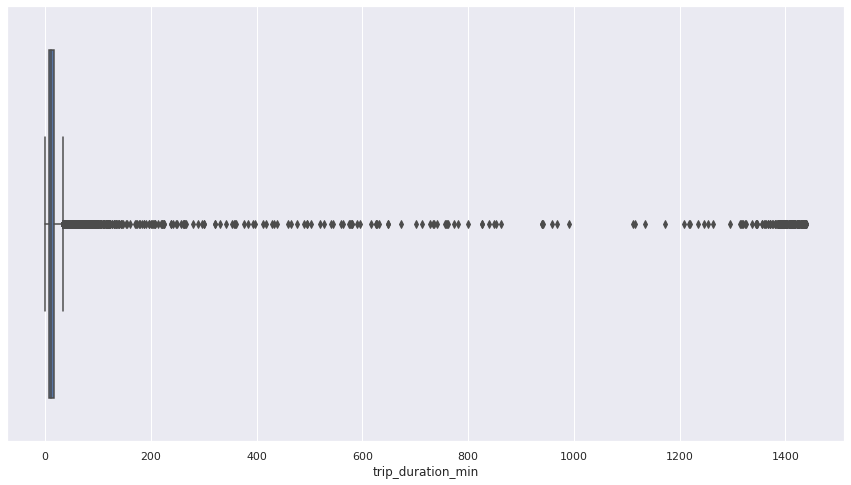

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(df_2['trip_duration_min'])

As we se from above there are many outliers around zero.

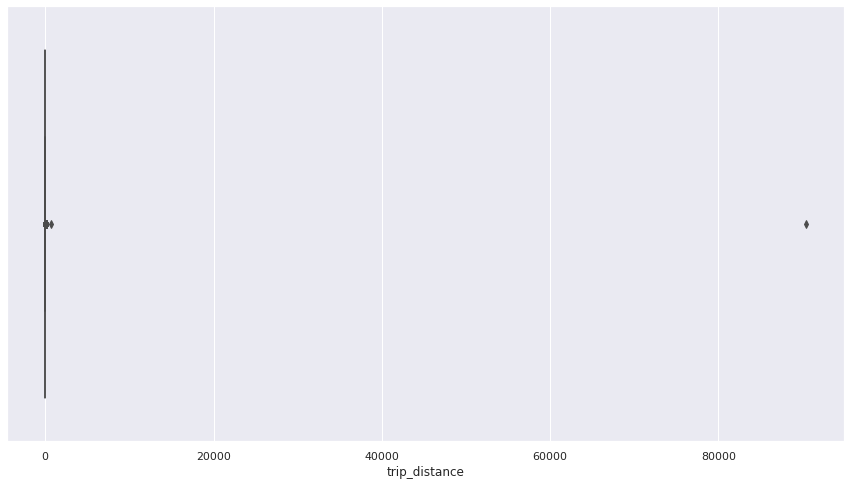

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(df_2['trip_distance'])

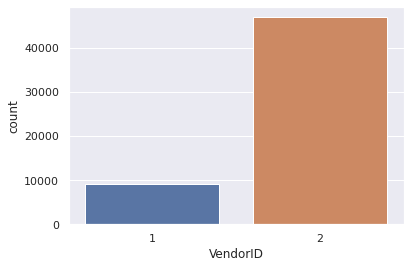

In [29]:
sns.countplot(x='VendorID',data=df_2)

In [30]:
df_2.VendorID.value_counts()

2    46916
1     9210
Name: VendorID, dtype: int64

# ***Vendor 2 has more rides. ***






In [31]:
df_2.passenger_count.value_counts()

1.0    48845
2.0     4240
5.0     1084
6.0      805
3.0      726
0.0      212
4.0      207
8.0        5
7.0        2
Name: passenger_count, dtype: int64

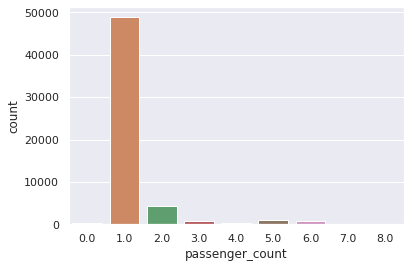

In [32]:
sns.countplot(x='passenger_count',data=df_2)

# ***There are more single passengers. So may be we can design more small cars for better service and less carbon foot print.***

> Indented block





*   There are even rides with 0 people. 7 and 8 as well.
*   So we will remove those as rides with 1 pass engeers are more.




In [33]:
df_2=df_2[df_2['passenger_count']!=0]
df_2=df_2[df_2['passenger_count']<=6]

In [34]:
df_2.passenger_count.value_counts()

1.0    48845
2.0     4240
5.0     1084
6.0      805
3.0      726
4.0      207
Name: passenger_count, dtype: int64

In [35]:
df_2['store_and_fwd_flag'].value_counts(normalize=True)

N    0.989679
Y    0.010321
Name: store_and_fwd_flag, dtype: float64

We see there are less than 2% of trips that were stored before forwarding

In [36]:
df_2['trip_distance'].value_counts()

0.00     3274
1.40      531
1.10      463
1.30      439
1.20      435
         ... 
27.78       1
23.55       1
27.04       1
11.68       1
11.98       1
Name: trip_distance, Length: 1746, dtype: int64

We see there are 2893 trips with 0 km distance.

The reasons for 0 km distance can be:



*   The dropoff location couldn’t be tracked.
*   The driver deliberately took this ride to complete a target ride number.
*   The passengers canceled the trip.




We will analyze these trips further in bivariate analysis.

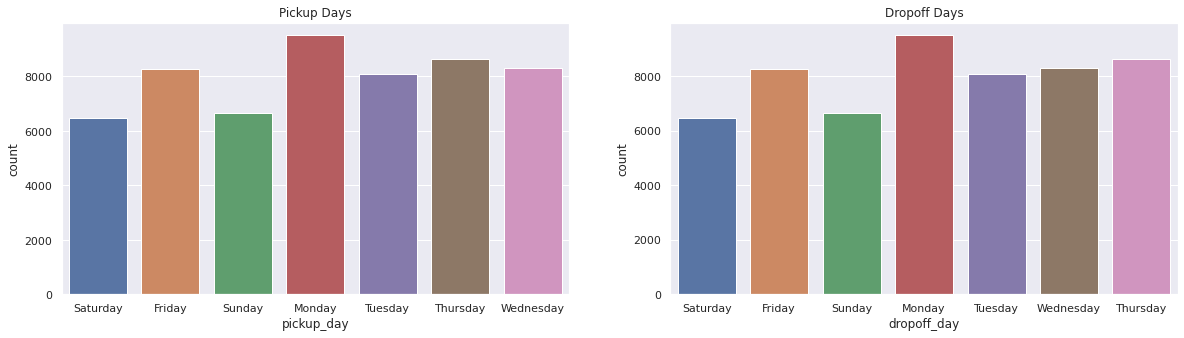

In [37]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df_2,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df_2,ax=ax2)

# ***We See Monday to Friday are the busiest days than weekends as the reason of more people communting to their work more on taxi's.***

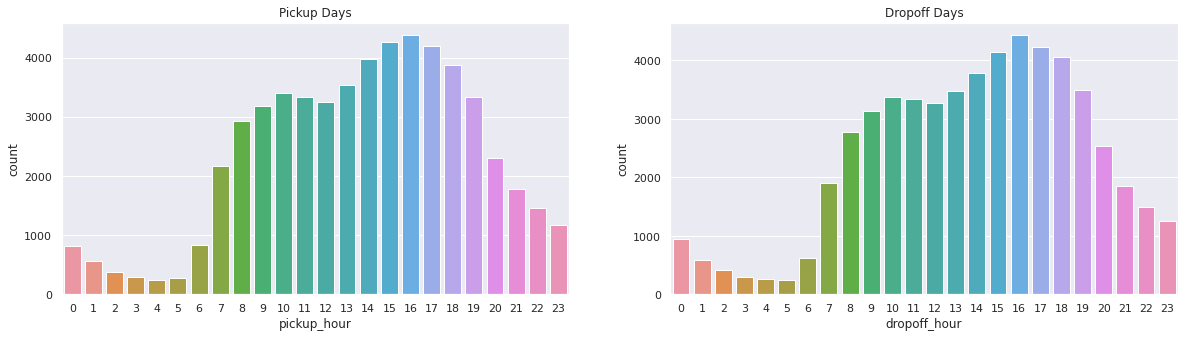

In [38]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=df_2,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=df_2,ax=ax10)

# ***We see the busiest hours are 8:00 am to 7:00 pm and that makes sense as this is the time when people go and return from their offices.***

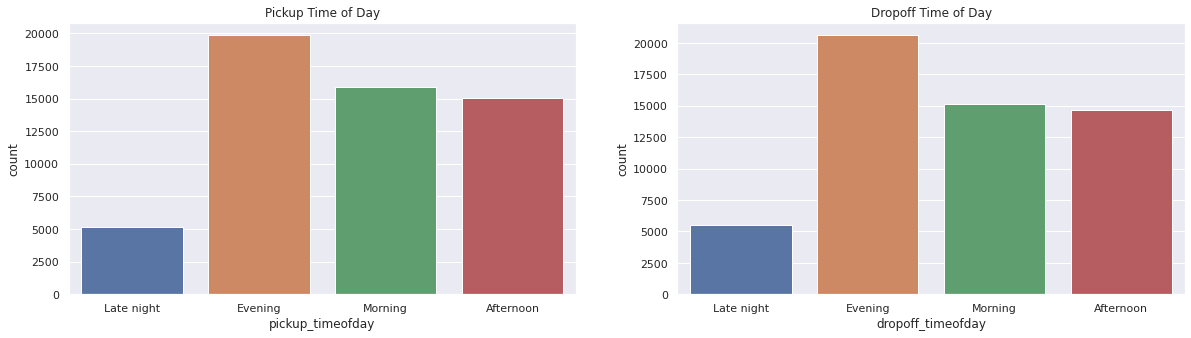

In [39]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df_2,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df_2,ax=ax4)

# ***As we saw above, evenings are the busiest.***



# **Bivariate Analysis .**

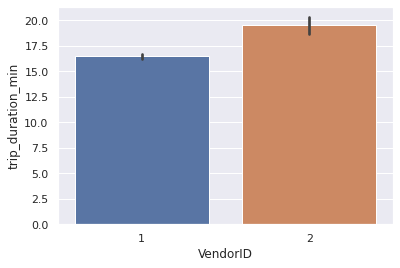

In [40]:
sns.barplot(y='trip_duration_min',x='VendorID',data=df_2,estimator=np.mean)

# **VendorID 2 takes longer trips as compared to vendor 1.**



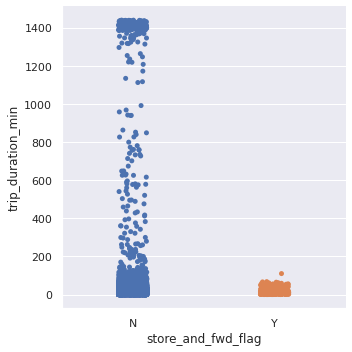

In [41]:
sns.catplot(y='trip_duration_min',x='store_and_fwd_flag',data=df_2,kind='strip')

# **Trip duration is generally longer for trips whose flag was not stored.**

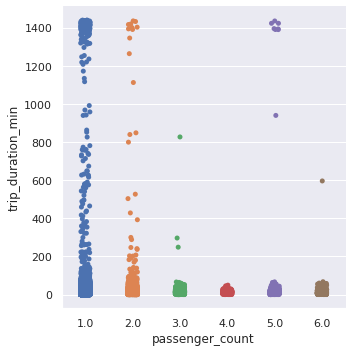

In [42]:
sns.catplot(y='trip_duration_min',x='passenger_count',data=df_2,kind='strip')


# **There is no visible relation between trip duration and passenger count. But more passenger count does have short durations from 3 to 6.**

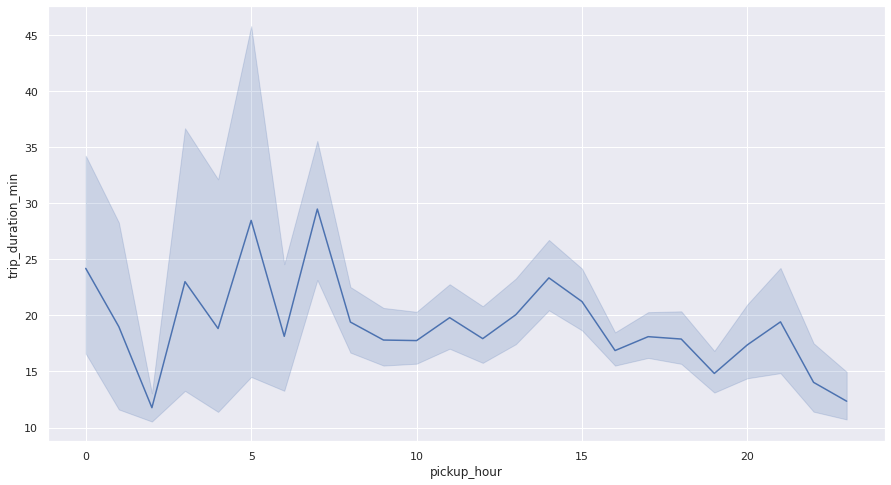

In [43]:
plt.figure(figsize=(15,8))
sns.lineplot(x='pickup_hour',y='trip_duration_min',data=df_2)

# We see the trip duration is the maximum around 5 and 7 am which may be because peopel traveeling from one place fo city to other to reach their work on time.
# Trip duration is the lowest around 11 pm as streets may not be busy.

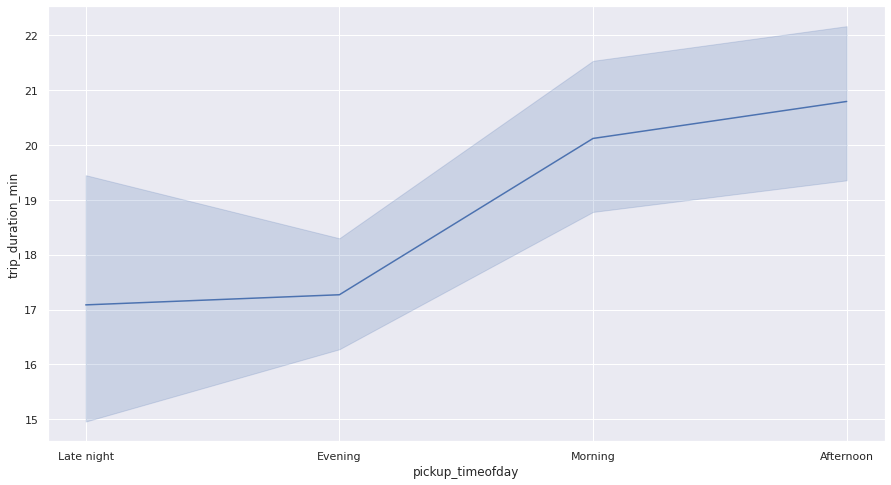

In [44]:
plt.figure(figsize=(15,8))
sns.lineplot(x='pickup_timeofday',y='trip_duration_min',data=df_2)

# As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning.

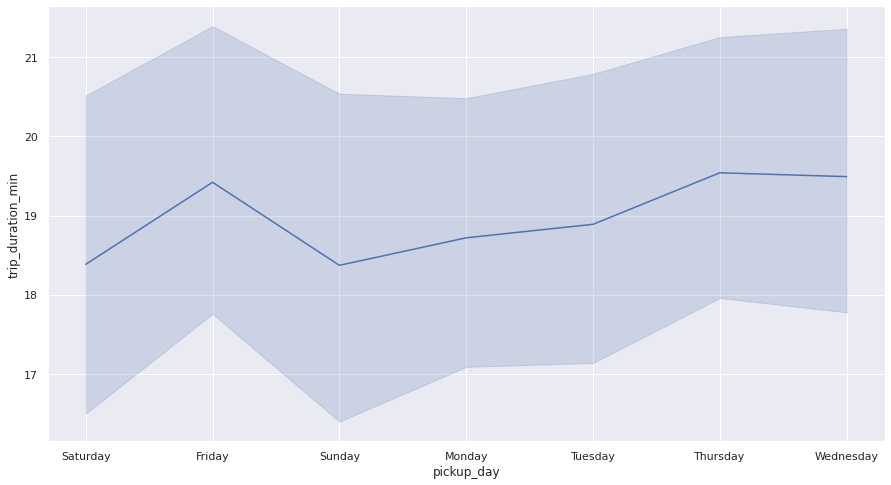

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(x='pickup_day',y='trip_duration_min',data=df_2)

# **Trip duration is the longest on Fridays closely followed by Thursday and Wednessday.**



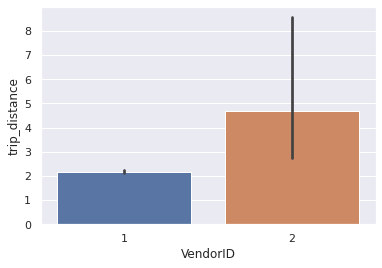

In [46]:
sns.barplot(y='trip_distance',x='VendorID',data=df_2,estimator=np.mean)

# **Vendor 2 covered more distance than vendor 1**

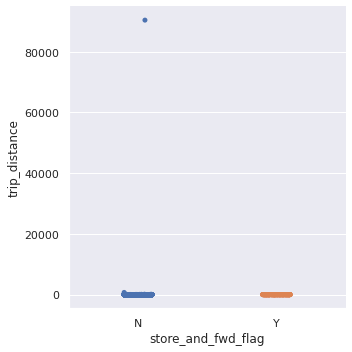

In [47]:

sns.catplot(y='trip_distance',x='store_and_fwd_flag',data=df_2,kind='strip')

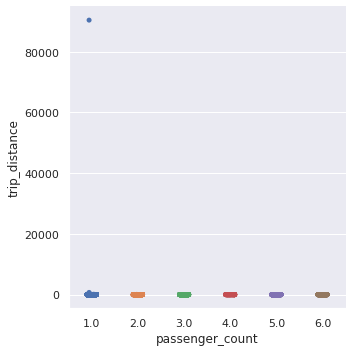

In [48]:

sns.catplot(y='trip_distance',x='passenger_count',data=df_2,kind='strip')

# **We see some of the longer distances are covered by  1 passenger rides.**

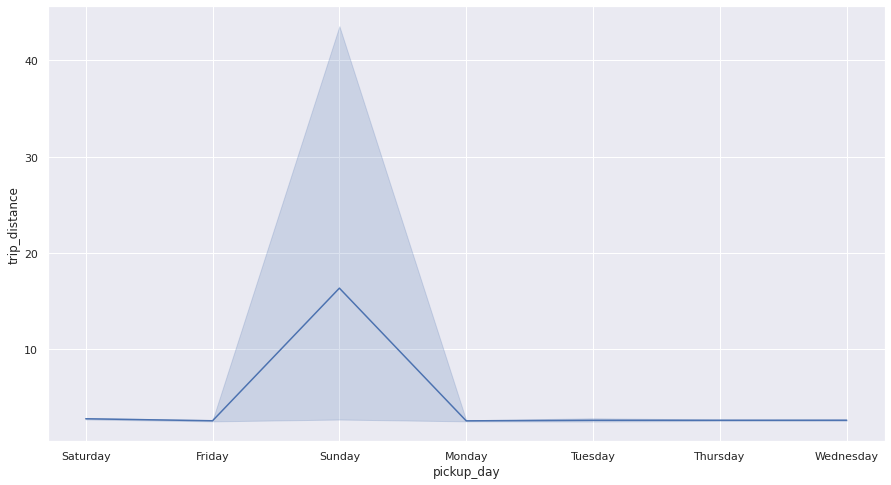

In [49]:
plt.figure(figsize=(15,8))
sns.lineplot(x='pickup_day',y='trip_distance',data=df_2)

# **Distances are longer on Sundays probably because it’s weekend**

# **rest of days looks same.**

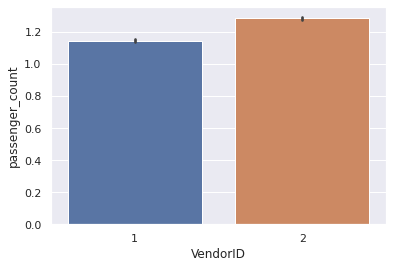

In [50]:
sns.barplot(y='passenger_count',x='VendorID',data=df_2)


# **This shows that vendor 2 generally carries more than 1 passengers while vendor 1 carries 1 passenger per ride on an average.**


<Figure size 1080x576 with 0 Axes>

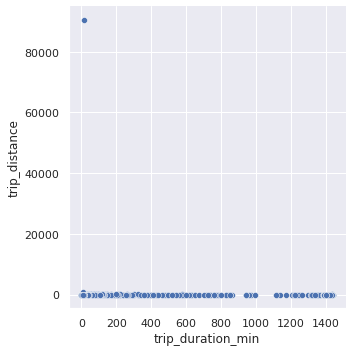

In [51]:
plt.figure(figsize=(15,8))
sns.relplot(y=df_2.trip_distance,x='trip_duration_min',data=df_2)

## **We can see even though distance is recorded as 0 but trip duration is definitely more.There are 3274 records


*   One reason can be that the dropoff coordinates weren’t recorded.
*   Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.



In [52]:
df_2[df_2['trip_distance']==0].shape[0]

3274

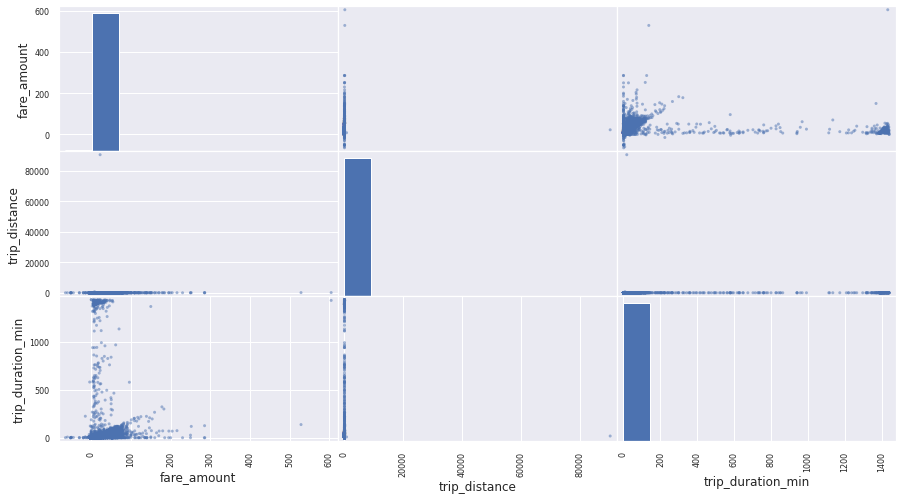

In [53]:
pd.plotting.scatter_matrix(frame = df_2[['fare_amount', 'trip_distance', 'trip_duration_min']], figsize=(15,8));

# ***As can be seen from the chart, there are significant outliers for all three columns. Let’s perform an outlier removal and plot again.***

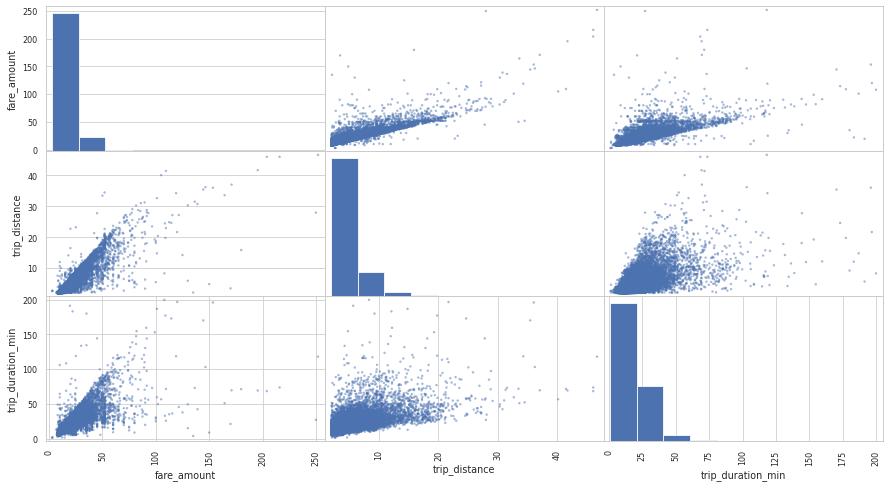

In [86]:
df_filtered = df_2[(df_2['trip_distance'] >= 2) & (df_2['trip_distance'] <= 50) &\
                 (df_2['fare_amount'] >= 3) & (df_2['fare_amount'] <=300) & \
                 (df_2['trip_duration_min'] <= 200) & (df_2['trip_duration_min'] > 1)].copy()

# Visualise the columns to be used for simple intuitive model
pd.plotting.scatter_matrix(frame = df_filtered[['fare_amount', 'trip_distance', 'trip_duration_min']], figsize=(15,8));


In [55]:
numerical_col = df_filtered.select_dtypes(include=['float64','int64','Int64'])
correl = numerical_col.dropna().corr()

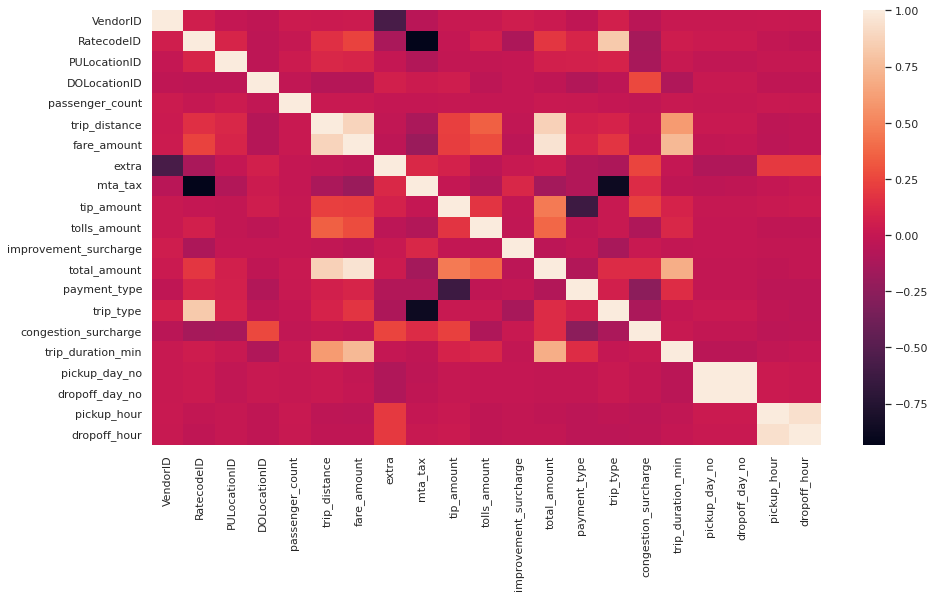

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(correl)

# **Much better! Also, we can clearly see that there is a strong correlation between fare_amount to both the trip_distance and the trip_duration_min. from heat map we can see more correlations like RateCodeID vs triptype trip_distance vs total amount and more**.

# **Tip Analysis on time of the day and day of the week**

In [57]:
hourly_tip = pd.DataFrame(df_2.tip_amount.groupby(df_2.pickup_timeofday).mean())
hourly_tip

,tip_amount
pickup_timeofday,
Afternoon,1.481719
Evening,1.616791
Late night,1.485642
Morning,1.441168


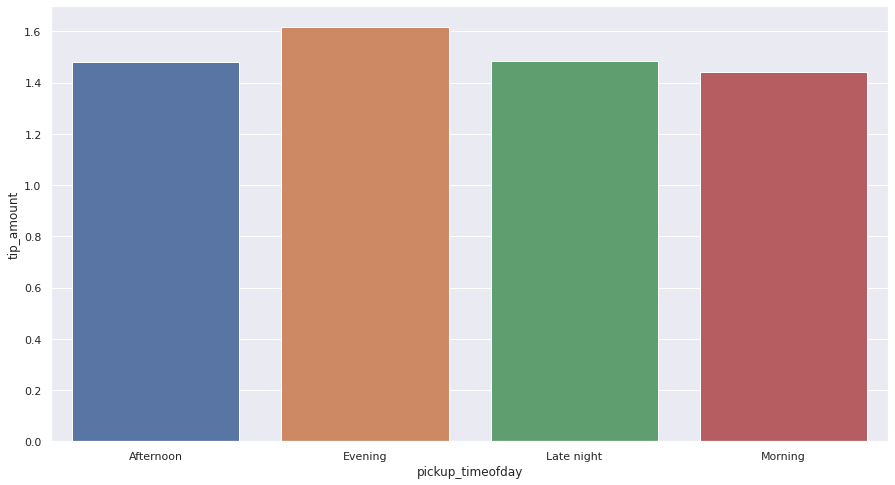

In [58]:
plt.figure(figsize=(15,8))
sns.barplot(y = hourly_tip['tip_amount'],x =hourly_tip.index,)

# **There are more tips in Evening follwed by afternoon and late night**

In [59]:
day_tip = pd.DataFrame(df_2.tip_amount.groupby(df_2.pickup_day).mean())
day_tip

,tip_amount
pickup_day,
Friday,1.518220
Monday,1.479935
Saturday,1.572588
Sunday,1.585488
Thursday,1.499520
Tuesday,1.501107
Wednesday,1.503717


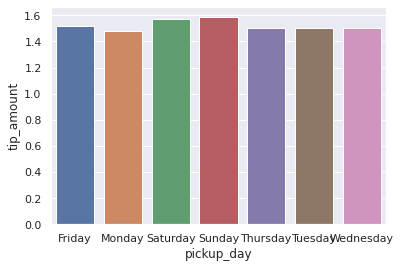

In [60]:
sns.barplot(y=day_tip.tip_amount,x=day_tip.index,)

# **There More tips on weekends.**

In [61]:
day_distance = pd.DataFrame(df_2.trip_distance.groupby(df_2.pickup_day).mean())
day_distance

,trip_distance
pickup_day,
Friday,2.592794
Monday,2.585406
Saturday,2.800130
Sunday,16.360024
Thursday,2.645783
Tuesday,2.642540
Wednesday,2.649348


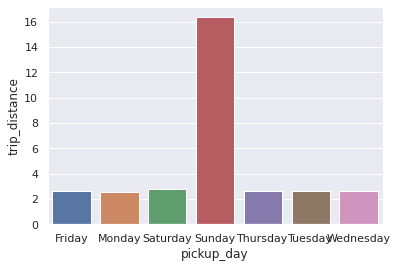

In [62]:
sns.barplot(y=day_distance.trip_distance,x=day_distance.index)

# **The Trip Distance on Sunday is more than any other on the week.Due to weekdEnd.**

In [63]:
hourly_distance = pd.DataFrame(df_2.trip_distance.groupby(df_2.pickup_timeofday).mean())

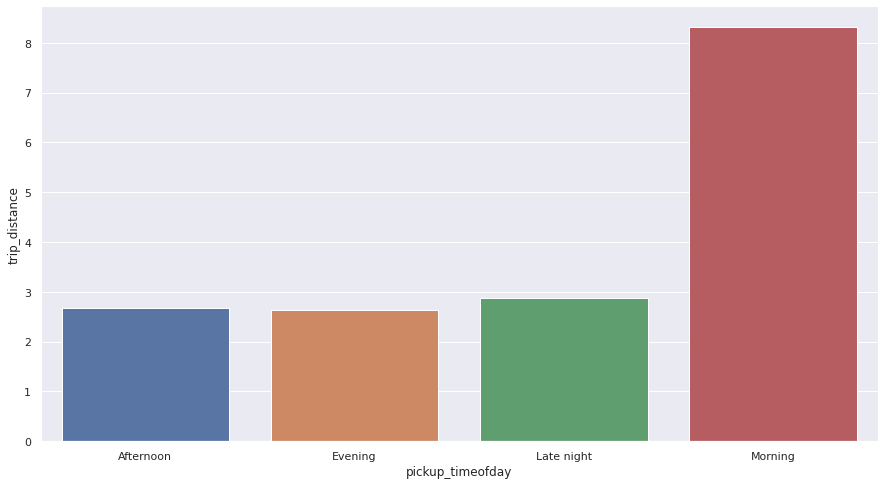

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(y=hourly_distance.trip_distance,x=hourly_distance.index)

# **Most of the distance is covered in Moring part of the day.**

In [65]:
hourly_duration = pd.DataFrame(df_2.trip_duration_min.groupby(df_2.pickup_timeofday).mean())

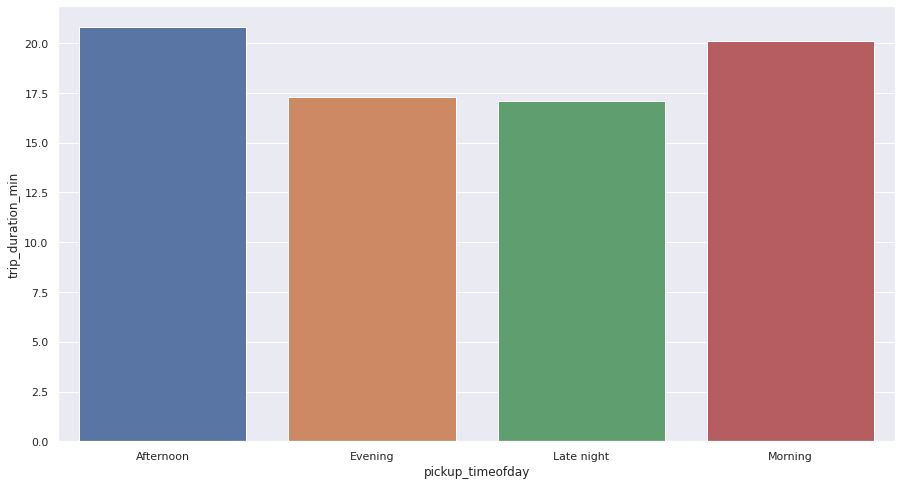

In [66]:
plt.figure(figsize=(15,8))
sns.barplot(y=hourly_duration.trip_duration_min,x=hourly_duration.index)

# **Most of the log duration trips are in Morning and afternoon as the roads are busy and peopele are comuting to work.**

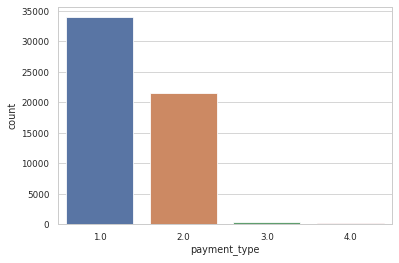

In [77]:
sns.countplot(x='payment_type',data=df_2)

# **From above the maximum peopele preffred to pay with creditcard follwed by the cash**

In [83]:
df_filtered['Avg_speed'] = 60*(df_filtered['trip_distance']/df_filtered['trip_duration_min'])
df_filtered['Avg_speed'].max()

180.0

In [84]:
df_filtered['Avg_speed'].mean()

14.547722711611474

# ***The mean average speed of the trips is 18.82 miles per hour***

In [70]:
hourly_avgspeed = pd.DataFrame(df_2.Avg_speed.groupby(df_2.pickup_timeofday).mean())

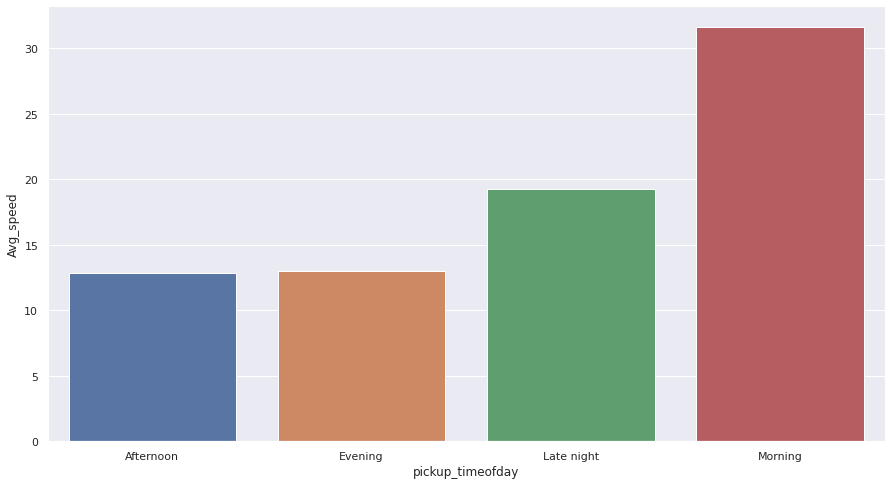

In [71]:
plt.figure(figsize=(15,8))
sns.barplot(y=hourly_avgspeed.Avg_speed,x=hourly_duration.index)

# ***the avarage speed is more in the mornings and follwed by late nights.***

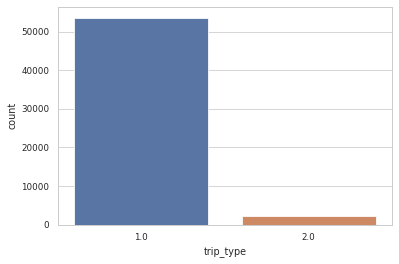

In [78]:
sns.countplot(x='trip_type',data=df_2)

# *There are more Street hails than the actual dispatch.*

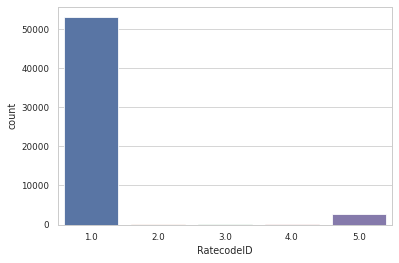

In [79]:
sns.countplot(x='RatecodeID',data=df_2)

# **so, there are passengers traveled with Standard rates than the negotiated prices.**

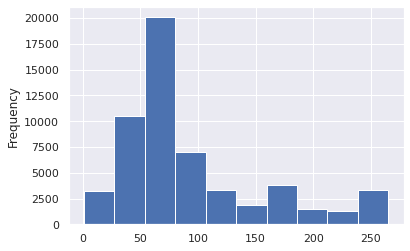

In [74]:
df_2['PULocationID'].plot.hist()

# **So, The majority of pick ups are in zone between 50 to 75. maybe a big residential are in between 50 an 75**

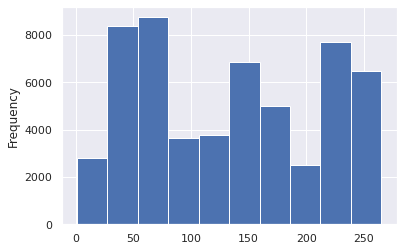

In [75]:
df_2['DOLocationID'].plot.hist()

# **So, The majority of Drop location are from 25 to 75 zones and followed by 200 to 250 zone.**



# The more taxis should be place in zone between 50 to 250. If local govt is analysing they should build good commutes between these zones like buiding new infra or running more services in the areas.


<Figure size 1080x576 with 0 Axes>

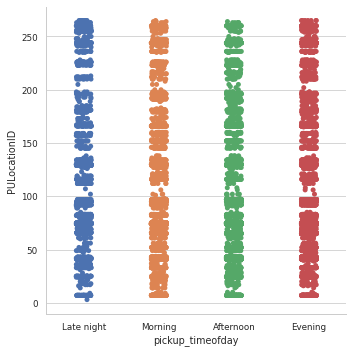

In [76]:
sns.set(context="paper", style="whitegrid")

# Create the plot
plt.figure(figsize=(15,8))

sns.catplot(data=df_filtered, x='pickup_timeofday', y='PULocationID')
plt.show()

# *Here, i want to show at what time there are more pickups from different  zones. So, that we can arrange more taxis in those zones. but unfortunately, i can't find a way to increase a plot size*

